In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf
import sklearn as skl
import datetime 

C:\Users\sebac\anaconda3\envs\pythondate\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sebac\anaconda3\envs\pythondate\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\sebac\anaconda3\envs\pythondate\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\sebac\anaconda3\envs\pythondate\lib\site-packages

In [3]:
trump_covid_df = pd.read_csv("Oct2_trump_2020_covid.csv")
trump_covid_df.head(5)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1.312180e+18,1.311890e+18,2020-10-02 19:59:59 Eastern Daylight Time,10/2/2020,19:59:59,-400,1.255360e+18,fazr50615418,Fazr,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '1278523603357700096', 'username':...",NaN,NaN,NaN,NaN
1,1.312180e+18,1.312170e+18,2020-10-02 19:59:59 Eastern Daylight Time,10/2/2020,19:59:59,-400,1.286430e+18,leticiadr4,Leticia,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '22732549', 'username': 'GiordanoT...",NaN,NaN,NaN,NaN
2,1.312180e+18,1.312160e+18,2020-10-02 19:59:59 Eastern Daylight Time,10/2/2020,19:59:59,-400,2.369624e+09,12345kaliroll,Alex Kali,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '25073877', 'username': 'realDonal...",NaN,NaN,NaN,NaN
3,1.312180e+18,1.312150e+18,2020-10-02 19:59:59 Eastern Daylight Time,10/2/2020,19:59:59,-400,1.241580e+18,yomeque63273072,CH!V!TA#FueraMorena2021,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '1154478078036516864', 'username':...",NaN,NaN,NaN,NaN
4,1.312180e+18,1.312160e+18,2020-10-02 19:59:59 Eastern Daylight Time,10/2/2020,19:59:59,-400,3.277799e+08,shindig101,Jenny,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '1107755834', 'username': 'kaur_je...",NaN,NaN,NaN,NaN


In [4]:
trump_covid_df.dtypes

id                 float64
conversation_id    float64
created_at          object
date                object
time                object
timezone             int64
user_id            float64
username            object
name                object
place               object
tweet               object
language            object
mentions            object
urls                object
photos              object
replies_count        int64
retweets_count       int64
likes_count          int64
hashtags            object
cashtags            object
link                object
retweet            float64
quote_url           object
video                int64
thumbnail           object
near               float64
geo                float64
source             float64
user_rt_id         float64
user_rt            float64
retweet_id         float64
reply_to            object
retweet_date       float64
translate          float64
trans_src          float64
trans_dest         float64
dtype: object

In [5]:
trump_covid_df.isnull().sum(axis = 0)

id                      0
conversation_id         0
created_at              0
date                    0
time                    0
timezone                0
user_id                 0
username                0
name                   57
place              326013
tweet                   0
language                0
mentions                0
urls                    0
photos                  0
replies_count           0
retweets_count          0
likes_count             0
hashtags                0
cashtags                0
link                    0
retweet            326050
quote_url          312973
video                   0
thumbnail          285422
near               326050
geo                326050
source             326050
user_rt_id         326050
user_rt            326050
retweet_id         326050
reply_to                0
retweet_date       326050
translate          326050
trans_src          326050
trans_dest         326050
dtype: int64

In [6]:
#columns to drop 
columns = ['place', 'retweet', 'quote_url','near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'retweet_date', 'translate', 'trans_src', 'trans_dest']
trump_covid_df.drop(columns, axis = 1, inplace = True)
trump_covid_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,video,thumbnail,reply_to
0,1.312180e+18,1.311890e+18,2020-10-02 19:59:59 Eastern Daylight Time,10/2/2020,19:59:59,-400,1.255360e+18,fazr50615418,Fazr,@Katcher010101 @realDonaldTrump @FLOTUS Yea! A...,...,[],1,0,0,[],[],https://twitter.com/Fazr50615418/status/131218...,0,NaN,"{'user_id': '1278523603357700096', 'username':..."
1,1.312180e+18,1.312170e+18,2020-10-02 19:59:59 Eastern Daylight Time,10/2/2020,19:59:59,-400,1.286430e+18,leticiadr4,Leticia,@GiordanoTaylor @stella_immanuel @IvankaTrump ...,...,[],0,0,1,[],[],https://twitter.com/Leticiadr4/status/13121805...,0,NaN,"{'user_id': '22732549', 'username': 'GiordanoT..."
2,1.312180e+18,1.312160e+18,2020-10-02 19:59:59 Eastern Daylight Time,10/2/2020,19:59:59,-400,2.369624e+09,12345kaliroll,Alex Kali,@realDonaldTrump Prayers are with you,...,[],0,0,0,[],[],https://twitter.com/12345kaliroll/status/13121...,0,NaN,"{'user_id': '25073877', 'username': 'realDonal..."
3,1.312180e+18,1.312150e+18,2020-10-02 19:59:59 Eastern Daylight Time,10/2/2020,19:59:59,-400,1.241580e+18,yomeque63273072,CH!V!TA#FueraMorena2021,@anhisu7 @ANPNL05 @realDonaldTrump @FLOTUS htt...,...,['https://pbs.twimg.com/tweet_video_thumb/EjXN...,1,0,0,[],[],https://twitter.com/YOMEQUE63273072/status/131...,1,https://pbs.twimg.com/tweet_video_thumb/EjXNQ0...,"{'user_id': '1154478078036516864', 'username':..."
4,1.312180e+18,1.312160e+18,2020-10-02 19:59:59 Eastern Daylight Time,10/2/2020,19:59:59,-400,3.277799e+08,shindig101,Jenny,@kaur_jeeto @realDonaldTrump this dude is delu...,...,[],1,0,0,[],[],https://twitter.com/shindig101/status/13121805...,0,NaN,"{'user_id': '1107755834', 'username': 'kaur_je..."


In [7]:
trump_covid_df.username.nunique()

211814

In [8]:
tweet_time = trump_covid_df.time.value_counts()
tweet_time

18:37:49    62
18:37:57    61
18:36:03    58
18:38:48    58
18:35:15    56
            ..
17:14:57     3
17:12:38     3
15:54:40     3
16:02:47     3
17:06:00     3
Name: time, Length: 19432, dtype: int64

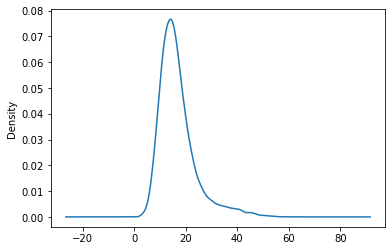

In [24]:
# Visualize the value counts
tweet_time.plot.density()

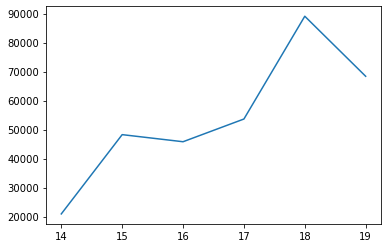

In [12]:
#Tweets per Hour
trump_covid_df["hour"]=pd.to_datetime(trump_covid_df['time'], format='%H:%M:%S').dt.hour
hours=trump_covid_df.hour.value_counts()
hours.sort_index(ascending=True, inplace=True)
hours.plot()

In [13]:
def cleaned_tweet (row):
    clean_tweet=row["tweet"]
    s = []
    for word in clean_tweet.split():
        if '@' not in word and 'https' not in word and '#' not in word:
            s.append(word)
    return (' ').join(s)

In [14]:
def label_na (row):
    if len(row['cleaned_tweet'].strip())==0: 
        return np.NaN
    else:
        return row["cleaned_tweet"]

In [15]:
trump_covid_df["cleaned_tweet"]=trump_covid_df.apply (lambda row: cleaned_tweet(row), axis=1)

In [16]:
trump_covid_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,retweets_count,likes_count,hashtags,cashtags,link,video,thumbnail,reply_to,hour,cleaned_tweet
0,1.312180e+18,1.311890e+18,2020-10-02 19:59:59 Eastern Daylight Time,10/2/2020,19:59:59,-400,1.255360e+18,fazr50615418,Fazr,@Katcher010101 @realDonaldTrump @FLOTUS Yea! A...,...,0,0,[],[],https://twitter.com/Fazr50615418/status/131218...,0,NaN,"{'user_id': '1278523603357700096', 'username':...",19,Yea! And no one gives a flying fuck about thos...
1,1.312180e+18,1.312170e+18,2020-10-02 19:59:59 Eastern Daylight Time,10/2/2020,19:59:59,-400,1.286430e+18,leticiadr4,Leticia,@GiordanoTaylor @stella_immanuel @IvankaTrump ...,...,0,1,[],[],https://twitter.com/Leticiadr4/status/13121805...,0,NaN,"{'user_id': '22732549', 'username': 'GiordanoT...",19,❤️🙏❤️🙏❤️🙏❤️
2,1.312180e+18,1.312160e+18,2020-10-02 19:59:59 Eastern Daylight Time,10/2/2020,19:59:59,-400,2.369624e+09,12345kaliroll,Alex Kali,@realDonaldTrump Prayers are with you,...,0,0,[],[],https://twitter.com/12345kaliroll/status/13121...,0,NaN,"{'user_id': '25073877', 'username': 'realDonal...",19,Prayers are with you
3,1.312180e+18,1.312150e+18,2020-10-02 19:59:59 Eastern Daylight Time,10/2/2020,19:59:59,-400,1.241580e+18,yomeque63273072,CH!V!TA#FueraMorena2021,@anhisu7 @ANPNL05 @realDonaldTrump @FLOTUS htt...,...,0,0,[],[],https://twitter.com/YOMEQUE63273072/status/131...,1,https://pbs.twimg.com/tweet_video_thumb/EjXNQ0...,"{'user_id': '1154478078036516864', 'username':...",19,
4,1.312180e+18,1.312160e+18,2020-10-02 19:59:59 Eastern Daylight Time,10/2/2020,19:59:59,-400,3.277799e+08,shindig101,Jenny,@kaur_jeeto @realDonaldTrump this dude is delu...,...,0,0,[],[],https://twitter.com/shindig101/status/13121805...,0,NaN,"{'user_id': '1107755834', 'username': 'kaur_je...",19,this dude is delusional cnn watching pedo


In [20]:
trump_covid_df = trump_covid_df[trump_covid_df['cleaned_tweet'].notna()]

In [21]:
trump_covid_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,retweets_count,likes_count,hashtags,cashtags,link,video,thumbnail,reply_to,hour,cleaned_tweet
0,1.312180e+18,1.311890e+18,2020-10-02 19:59:59 Eastern Daylight Time,10/2/2020,19:59:59,-400,1.255360e+18,fazr50615418,Fazr,@Katcher010101 @realDonaldTrump @FLOTUS Yea! A...,...,0,0,[],[],https://twitter.com/Fazr50615418/status/131218...,0,NaN,"{'user_id': '1278523603357700096', 'username':...",19,Yea! And no one gives a flying fuck about thos...
1,1.312180e+18,1.312170e+18,2020-10-02 19:59:59 Eastern Daylight Time,10/2/2020,19:59:59,-400,1.286430e+18,leticiadr4,Leticia,@GiordanoTaylor @stella_immanuel @IvankaTrump ...,...,0,1,[],[],https://twitter.com/Leticiadr4/status/13121805...,0,NaN,"{'user_id': '22732549', 'username': 'GiordanoT...",19,❤️🙏❤️🙏❤️🙏❤️
2,1.312180e+18,1.312160e+18,2020-10-02 19:59:59 Eastern Daylight Time,10/2/2020,19:59:59,-400,2.369624e+09,12345kaliroll,Alex Kali,@realDonaldTrump Prayers are with you,...,0,0,[],[],https://twitter.com/12345kaliroll/status/13121...,0,NaN,"{'user_id': '25073877', 'username': 'realDonal...",19,Prayers are with you
3,1.312180e+18,1.312150e+18,2020-10-02 19:59:59 Eastern Daylight Time,10/2/2020,19:59:59,-400,1.241580e+18,yomeque63273072,CH!V!TA#FueraMorena2021,@anhisu7 @ANPNL05 @realDonaldTrump @FLOTUS htt...,...,0,0,[],[],https://twitter.com/YOMEQUE63273072/status/131...,1,https://pbs.twimg.com/tweet_video_thumb/EjXNQ0...,"{'user_id': '1154478078036516864', 'username':...",19,
4,1.312180e+18,1.312160e+18,2020-10-02 19:59:59 Eastern Daylight Time,10/2/2020,19:59:59,-400,3.277799e+08,shindig101,Jenny,@kaur_jeeto @realDonaldTrump this dude is delu...,...,0,0,[],[],https://twitter.com/shindig101/status/13121805...,0,NaN,"{'user_id': '1107755834', 'username': 'kaur_je...",19,this dude is delusional cnn watching pedo


In [23]:
trump_covid_df.to_csv('super_clean_trump_covid_df.csv', index = False)